## 1. Importing Libraries

### 1.1 Importing necassary libraries and adding necessary configurations

In [1]:
# For numeric calculations
import numpy as np
import pandas as pd

# For model save operations
from pathlib import Path

# For performing random operations
import random

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For balancing the dataset
from imblearn.over_sampling import SMOTE

# For data preprocessing tasks
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# For machine learning
# Baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# For neural networks
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# For metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

# For parameter tuning

# For outlier detection
from scipy import stats

# Ignore warnings
import warnings

In [2]:
# Configurations
%matplotlib inline
warnings.filterwarnings('ignore')
random.seed(21)

## 2. Import data

### 2.1 Importing train and test data

In [3]:
# Importing train data
train_dataset_path = "./dataset/exoTrain.csv"
train_df = pd.read_csv(train_dataset_path, sep=",")

# Importing test data
test_dataset_path = "./dataset/exoTest.csv"
test_df = pd.read_csv(test_dataset_path, sep=",")

### 2.2 Combining the datasets

In [4]:
# Combining two dataframes for further investigation
df = pd.concat([train_df, test_df])
df.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [5]:
df.shape

(5657, 3198)

In [6]:
print(f'Dataset consists of {df.shape[0]} rows and {df.shape[1]} columns')

Dataset consists of 5657 rows and 3198 columns


### 2.3 Exploring basic statistics

In [7]:
# Get basic statistics for all columns
basic_stats = df.describe().T

# Displaying statistics for the first 10 columns
basic_stats.iloc[:10, :]

,count,mean,std,min,25%,50%,75%,max
LABEL,5657.0,1.007424,0.085852,1.00,1.00,1.00,1.00,2.0
FLUX.1,5657.0,181.877969,20781.963875,-227856.26,-39.84,-0.47,51.71,1439240.5
FLUX.2,5657.0,189.987960,21054.656517,-315440.76,-37.05,-0.76,46.15,1453319.0
FLUX.3,5657.0,185.974637,21157.448490,-284001.76,-35.73,-0.82,45.47,1468429.0
FLUX.4,5657.0,214.941396,21459.248650,-234006.87,-33.18,-0.42,42.50,1495750.0
FLUX.5,5657.0,193.912781,22247.554224,-423195.62,-30.50,-0.78,41.56,1510937.0
FLUX.6,5657.0,205.670115,23204.624477,-597552.12,-31.63,-1.16,35.88,1508152.5
FLUX.7,5657.0,157.200847,23230.965053,-672404.56,-27.41,-1.28,34.27,1465743.0
FLUX.8,5657.0,175.581633,22083.070436,-579013.56,-26.73,-0.94,31.97,1416827.0
FLUX.9,5657.0,158.951252,20323.489120,-397388.24,-26.44,-0.86,30.55,1342888.5


## 3. Exploratory Data Analysis

### 3.1 Looking into datatypes

In [8]:
print(df.dtypes)

LABEL          int64
FLUX.1       float64
FLUX.2       float64
FLUX.3       float64
FLUX.4       float64
              ...   
FLUX.3193    float64
FLUX.3194    float64
FLUX.3195    float64
FLUX.3196    float64
FLUX.3197    float64
Length: 3198, dtype: object


All of the datatypes are `int64` and `float64`

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5657 entries, 0 to 569
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 138.1 MB
None


### 3.2 Check for missing values

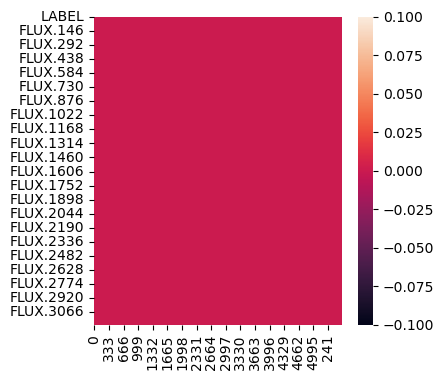

In [10]:
df.isnull().sum()

# # Visulization #1 :- Heatmap for null values
plt.figure(figsize = (4,4))

ax = plt.axes()
sns.heatmap(df.isnull().T, ax=ax)
plt.show()

No null values

### 3.3 Light Flux Differences

Let's see the difference between light curves of a exoplanet and non-exoplanet

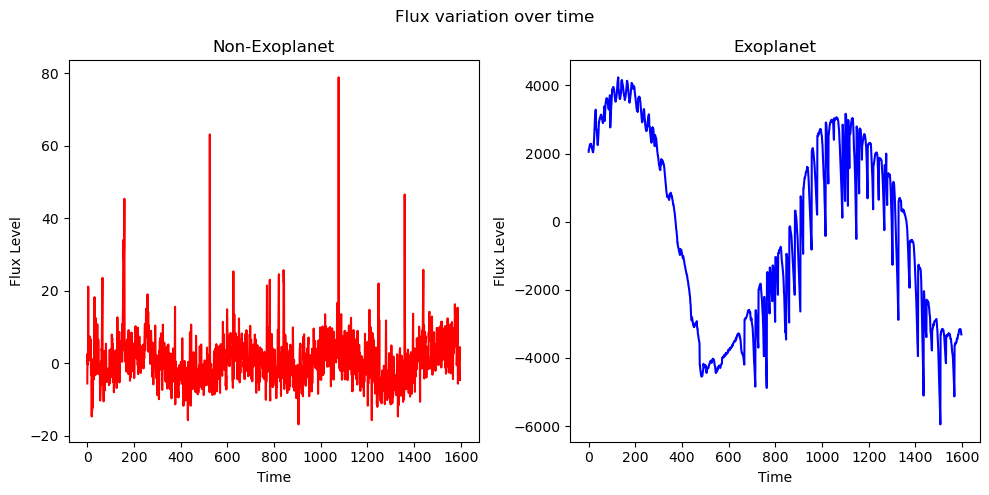

In [11]:
# Setting figure size
plt.figure(figsize=(10, 5))

# Non-exoplanet star light flux over time
row_index = 150 # Selecting random non-exoplanet row
column_end_index = df.shape[1]//2 # Selecting half of the flux values to plot
fluxes_non_exo = df.iloc[
                    row_index,
                    1: column_end_index
                ].values

plt.subplot(1, 2, 1)
plt.plot(fluxes_non_exo, color = "red")
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title("Non-Exoplanet")

# Exoplanet star light flux over time
row_index = 21 # Selecting random exoplanet row
column_end_index = df.shape[1]//2 # Selecting half of the flux values to plot
fluxes_exo = df.iloc[
                row_index,
                1: column_end_index
            ].values

plt.subplot(1, 2, 2)
plt.plot(fluxes_exo, color = "blue")
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title("Exoplanet")

plt.tight_layout()
plt.suptitle('Flux variation over time') 
plt.subplots_adjust(top=0.88)
plt.show()

### 3.5 Class Distribution

 Let's change the labels from 1 -> 0 and 2 -> 1 to maintain consistency

In [12]:
categories = {1: 0, 2: 1}
try:
    df.LABEL = [categories[key] for key in df.LABEL]
except KeyError:
    print(f"{KeyError} Keys does not match in LABEL column")

In [13]:
df["LABEL"].value_counts()

print(f"From {len(df["LABEL"])} rows, there are {df["LABEL"].value_counts()[0]} non-exoplanets and {df["LABEL"].value_counts()[1]} confirmed exoplanets in the dataset")

From 5657 rows, there are 5615 non-exoplanets and 42 confirmed exoplanets in the dataset


The class distribution looks imbalanced. Let's explore it more through visualizations

Pie Chart Distribution

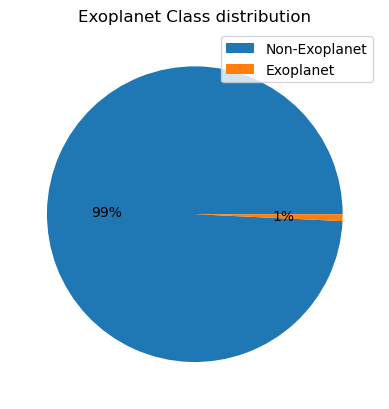

In [14]:
# Visulization #1 :- Plotting class distribution using pie chart
fig, ax = plt.subplots()
labels=["Non-Exoplanet", "Exoplanet"]

ax.pie(df["LABEL"].value_counts(), autopct='%.0f%%');
plt.title("Exoplanet Class distribution");
plt.legend(labels=labels)
plt.show();

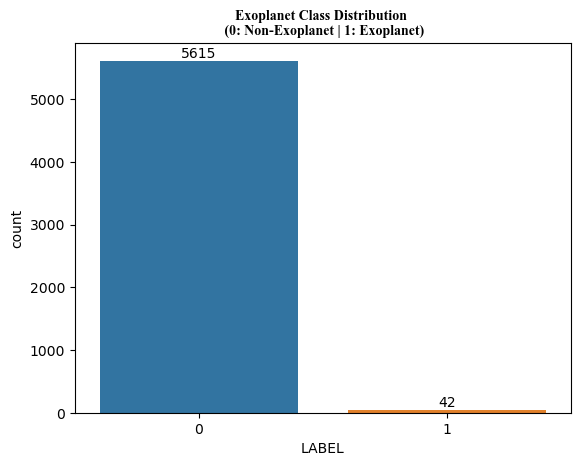

In [15]:
# Visulization #2 :- Number of Stars with Confirmed Exoplanets or Not
plt.title('Exoplanet Class Distribution \n (0: Non-Exoplanet | 1: Exoplanet)', fontsize=20, font='times new roman', weight='bold', color='black')
ax = sns.countplot(data=df, x="LABEL")
ax.bar_label(ax.containers[0])
plt.show();

We can see there's a class imbalance between non-exoplanet and exoplanet. We need to perform Synthetic Minority Over-sampling Technique (SMOTE) to make our machine learning generalize well. We use SMOTE technique because it generates synthetic samples for the minority class in the dataset.

Let's split the dataset into X, y before performing SMOTE.

In [16]:
X = df.drop("LABEL", axis=1)
y = df["LABEL"]

# Check initial shapes
print(f'Initial X shape: {X.shape}')
print(f'Initial y shape: {y.shape}')

Initial X shape: (5657, 3197)
Initial y shape: (5657,)


In [17]:
# Over sampling the imbalanced class
smote = SMOTE(random_state=21)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check resampled shapes
print(f'Resampled X shape: {X_resampled.shape}')
print(f'Resampled y shape: {y_resampled.shape}')

Resampled X shape: (11230, 3197)
Resampled y shape: (11230,)


In [18]:
# Check the class distribution before and after SMOTE
print('Original class distribution:')
print(y.value_counts())

print('Resampled class distribution:')
print(pd.Series(y_resampled).value_counts())

Original class distribution:
LABEL
0    5615
1      42
Name: count, dtype: int64
Resampled class distribution:
LABEL
1    5615
0    5615
Name: count, dtype: int64


Let's create a new dataframe with X_resampled and y_resampled data.

In [19]:
# Converting the resampled data into pandas DataFrame
X_new = pd.DataFrame(X_resampled, columns=X.columns)
y_new = pd.DataFrame(y_resampled, columns=["LABEL"])

# Combining both dataframes
resampled_df = pd.concat([X_new, y_new], axis=1)

resampled_df["LABEL"].value_counts()

LABEL
1    5615
0    5615
Name: count, dtype: int64

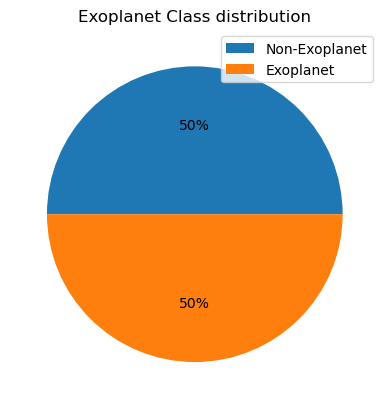

In [20]:
# Visulization #3 :- Plotting class distribution using pie chart after resampling
fig, ax = plt.subplots()
labels=["Non-Exoplanet", "Exoplanet"]

ax.pie(resampled_df["LABEL"].value_counts(), autopct='%.0f%%');
plt.title("Exoplanet Class distribution");
plt.legend(labels=labels)
plt.show();

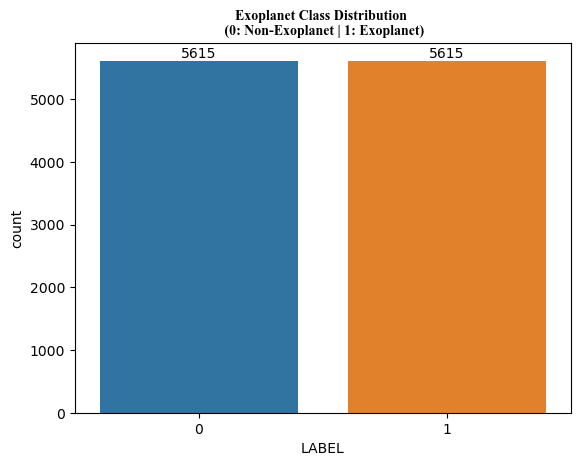

In [21]:
# Visulization #4 :- Number of Stars with Confirmed Exoplanets or Not
plt.title('Exoplanet Class Distribution \n (0: Non-Exoplanet | 1: Exoplanet)', fontsize=20, font='times new roman', weight='bold', color='black')
ax = sns.countplot(data=resampled_df, x="LABEL")
ax.bar_label(ax.containers[0])
plt.show();

Now the classes have been balanced.

### 3.6 Correlation Matrix

As we have lots of features, let's see how well the features are correlated and check whether we need to perform Principal Component Analysis (PCA) or not. We select random features and visualize their correlation matrix

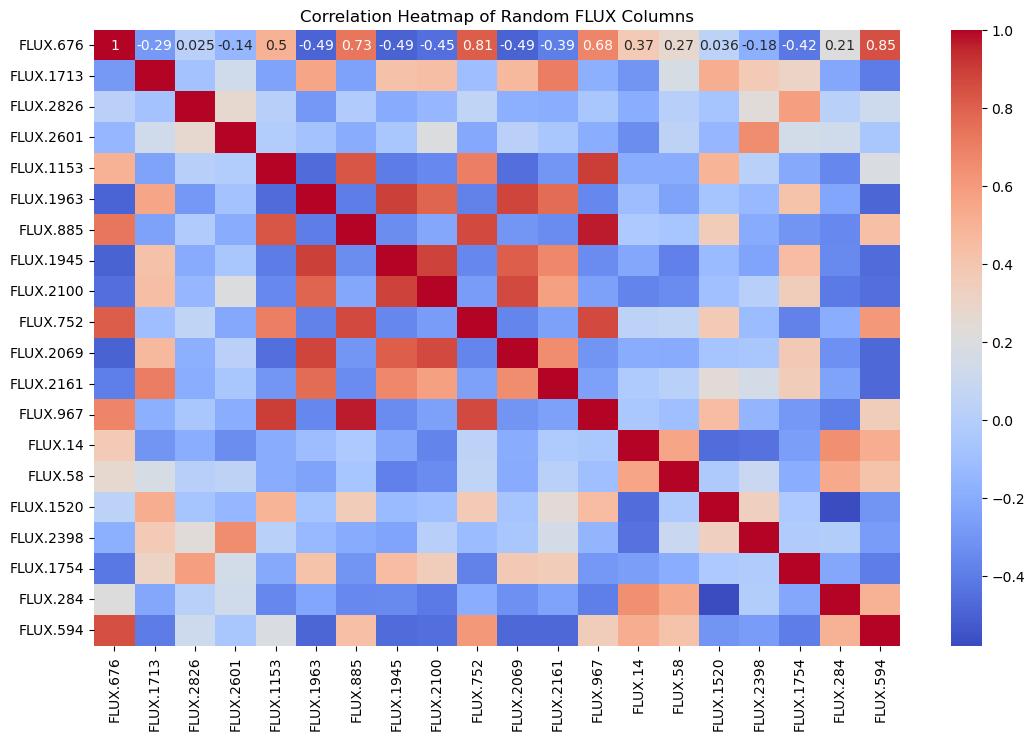

In [22]:
# Visualization #5 :- Correlation Matrix Heatmap of Random FLUX Columns

random.seed(21) # For reproducibility

# Select a random sample of 20 FLUX columns for the heatmap
random_columns = random.sample([column for column in resampled_df.columns if 'FLUX' in column], 20)

# Calculate the correlation matrix
correlation_matrix = resampled_df[random_columns].corr()

# Plot the heatmap
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Random FLUX Columns')
plt.show()

Fluxes within the range of 300-500 are correlated than the fluxes with the range >= 1000. 

Eg: FLUX.676 and FLUX.594 are highly correlated where as FLUX.676 and FLUX.1945 are not correlated.

## 4. Data Preprocessing

### 4.1 Outlier Detection and Removal

In [23]:
X = df.drop("LABEL", axis=1)
y = df["LABEL"]

z_scores = np.abs(stats.zscore(X))
outliers = np.where(z_scores > 3)

X_no_outliers = X[(z_scores < 3).all(axis=1)]
y_no_outliers = y[(z_scores < 3).all(axis=1)]

# Checking the shape of the data without outliers
print(f'X shape before removing outliers: {X.shape}')
print(f'y shape before removing outliers: {y.shape}')

# Checking the shape of the data without outliers
print(f'X shape after removing outliers: {X_no_outliers.shape}')
print(f'y shape after removing outliers: {y_no_outliers.shape}')

X shape before removing outliers: (5657, 3197)
y shape before removing outliers: (5657,)
X shape after removing outliers: (5578, 3197)
y shape after removing outliers: (5578,)


### 4.2 Princial Component Analysis (PCA)

Let's apply PCA (Principal Component Analysis) to reduce the number of features while retaining most of the variance.

In [24]:
# Splitting new X/y
X = resampled_df.drop("LABEL", axis=1)
y = resampled_df["LABEL"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
columns = [f'PCA_{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=columns)
df_pca['LABEL'] = y.values

# Display the first few rows of the PCA DataFrame
print(df_pca.head())

      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -0.775719  0.125636 -0.094548  0.096682 -0.007173 -0.587284  0.842335   
1 -0.785584  0.062364 -0.145164  0.008245 -0.072163 -0.463859  0.802860   
2 -0.895695 -0.303267 -0.358053 -0.396743 -0.147929 -0.414745  0.851439   
3 -0.821921  0.024550 -0.182021 -0.098240 -0.106838 -0.423944  0.718932   
4 -1.508305  0.236906  0.343450  0.790944  0.065128 -0.780053  0.758782   

      PCA_8     PCA_9    PCA_10    PCA_11    PCA_12    PCA_13  LABEL  
0  0.515994 -0.005868 -0.231959 -0.060041 -0.116888 -0.164412      1  
1  0.411444 -0.120262 -0.172418 -0.090425 -0.090172 -0.106301      1  
2  0.367629 -0.332858 -0.086240 -0.100173 -0.332687 -0.276597      1  
3  0.372788 -0.104859 -0.105992 -0.097760 -0.035524 -0.038423      1  
4  0.605113 -0.408690 -0.351618 -0.055795 -0.809691 -0.425517      1  


### 4.3 Split data into training and testing sets

In [25]:
# Split X, y
X = df_pca.drop("LABEL", axis=1)
y = df_pca["LABEL"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (8984, 13)
Test set shape: (2246, 13)


## 5. Model Selection

In [26]:
def buildModel(model, model_name, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)
    print(f"Training model: {model_name}")
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-----------------------------------------------------------")
    return y_pred

def visualize_confusion_matrix(y_pred_classes):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes)
    plt.title('Confusion Matrix')
    plt.show()

Let's us build baseline model to establish a baseline performance

### 5.1 Logistic Regression

In [27]:
log_reg = LogisticRegression()
y_pred_logreg = buildModel(model=log_reg, model_name="Logistic Regression")

Training model: Logistic Regression
[[1055   90]
 [ 823  278]]
              precision    recall  f1-score   support

           0       0.56      0.92      0.70      1145
           1       0.76      0.25      0.38      1101

    accuracy                           0.59      2246
   macro avg       0.66      0.59      0.54      2246
weighted avg       0.66      0.59      0.54      2246

-----------------------------------------------------------


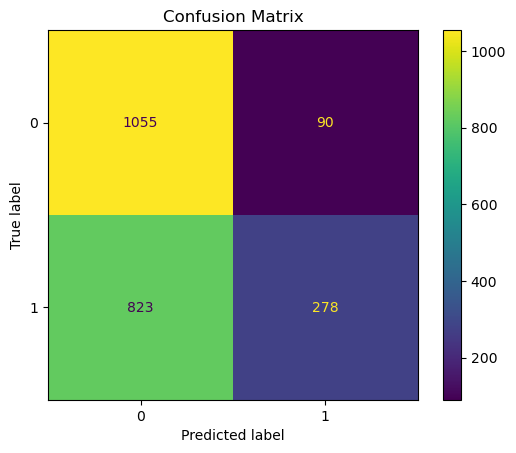

In [28]:
visualize_confusion_matrix(y_pred_logreg)

### 5.2 Decision Tree

In [29]:
decision_tree = DecisionTreeClassifier()
y_pred_tree = buildModel(model=decision_tree, model_name="Decision Tree Classifier")

Training model: Decision Tree Classifier
[[1083   62]
 [  24 1077]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1145
           1       0.95      0.98      0.96      1101

    accuracy                           0.96      2246
   macro avg       0.96      0.96      0.96      2246
weighted avg       0.96      0.96      0.96      2246

-----------------------------------------------------------


Decision tree is performing well on the data. Let's us check if the model is over-fitting on the data

In [30]:
# Evaluate on training data
y_pred_train = decision_tree.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))

# Evaluate on testing data
y_pred_test = decision_tree.predict(X_test)
print("Testing Accuracy: ", accuracy_score(y_test, y_pred_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9617097061442564


It doesn't look like over-fitting. Let's check using cross validation

In [31]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Cross-Validation Accuracy: 0.95 ± 0.00


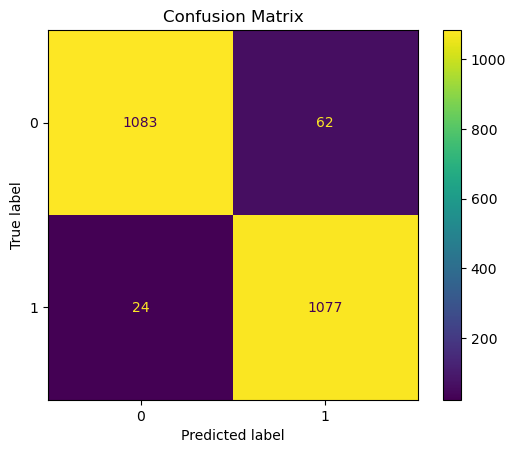

In [32]:
visualize_confusion_matrix(y_pred_tree)

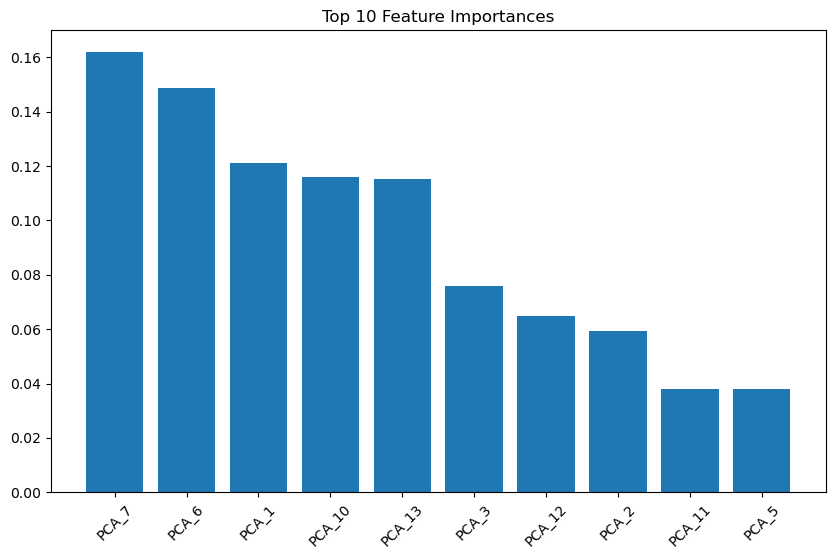

In [33]:
# Get feature importance from the model
feature_importance = decision_tree.feature_importances_

# Sort features by importance
sorted_data = np.argsort(feature_importance)[::-1]

# Plotting top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importance[sorted_data[:10]])
plt.xticks(range(10), np.array(X_train.columns)[sorted_data[:10]], rotation=45)
plt.title('Top 10 Feature Importances')
plt.show()

### 5.3 XGBoost

In [34]:
xgb = XGBClassifier()
y_pred_xgb = buildModel(model=xgb, model_name="XGBoost")

Training model: XGBoost
[[1118   27]
 [   3 1098]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1145
           1       0.98      1.00      0.99      1101

    accuracy                           0.99      2246
   macro avg       0.99      0.99      0.99      2246
weighted avg       0.99      0.99      0.99      2246

-----------------------------------------------------------


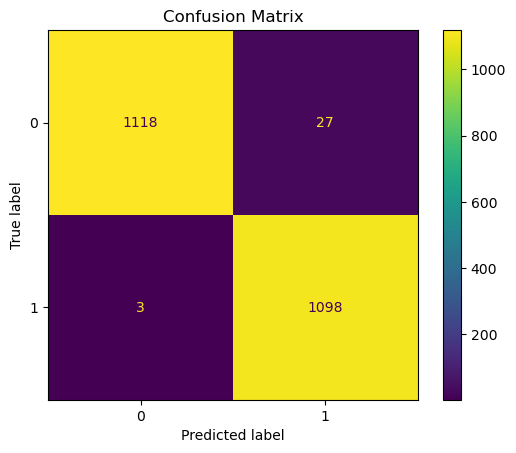

In [35]:
visualize_confusion_matrix(y_pred_xgb)

In [36]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Cross-Validation Accuracy: 0.98 ± 0.00


### 5.4 SVM

In [37]:
svm = SVC()
y_pred_svm = buildModel(model=svm, model_name="SVM")

Training model: SVM
[[1136    9]
 [1005   96]]
              precision    recall  f1-score   support

           0       0.53      0.99      0.69      1145
           1       0.91      0.09      0.16      1101

    accuracy                           0.55      2246
   macro avg       0.72      0.54      0.43      2246
weighted avg       0.72      0.55      0.43      2246

-----------------------------------------------------------


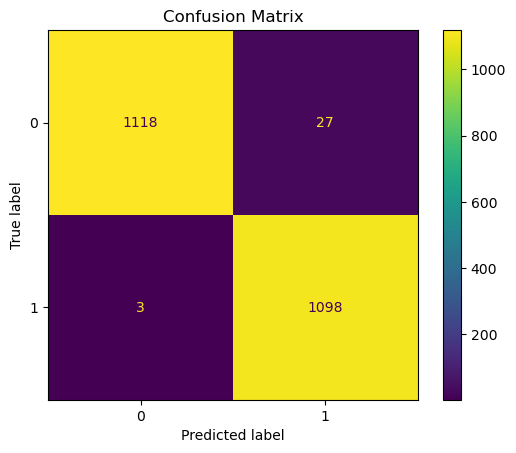

In [38]:
visualize_confusion_matrix(y_pred_xgb)

As we have many features. Let's implement a neural network using PyTorch to capture more complex patterns in the data, potentially leading to even better performance.

In [39]:
def to_tensor(data):
    return torch.from_numpy(data.values)

In [40]:
# Convert the data into PyTorch tensors
X_train_tensor = torch.tensor(to_tensor(X_train), dtype=torch.float32)
X_test_tensor = torch.tensor(to_tensor(X_test), dtype=torch.float32)
y_train_tensor = torch.tensor(to_tensor(y_train), dtype=torch.long)
y_test_tensor = torch.tensor(to_tensor(y_test), dtype=torch.long)

In [41]:
# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

### 5.5 Neural Network Architecture

In [42]:
class MLP(nn.Module):
    '''
        Multilayer Perceptron
    '''
    def __init__(self, input_size, hidden_size, classes):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.layer4 = nn.Linear(hidden_size, classes)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.layer4(x)
        return x

In [43]:
# Define the network
input_size = X_train.shape[1]  # Number of principal components
hidden_size = 128              # Number of neurons in the hidden layers - 97.91%
classes = len(y.unique())  # Number of output classes
model = MLP(input_size, hidden_size, classes)

In [44]:
print(model)

MLP(
  (layer1): Linear(in_features=13, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=2, bias=True)
)


In [45]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [46]:
torch.manual_seed(21)

# Training the model
# epochs = 80 # 97.64%
# epochs = 90 # 97.91%
epochs = 100 # 98.04%

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for data in train_loader:
        X_batch, y_batch = data

        # Forward pass
        y_pred = model(X_batch)

        # Calculating loss
        loss = loss_fn(y_pred, y_batch)
        
        # Zero grad optimizer
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Progress the optimizer
        optimizer.step()
        
        running_loss += loss.item()

    # Testing loop
    model.eval()  # Set the model to evaluation mode
    with torch.inference_mode():
        correct = 0
        total = 0
        for data in test_loader:
            X_batch, y_batch = data
            y_pred = model(X_batch)
            test_loss = loss_fn(y_pred, y_batch)

    if (epoch % 10 == 0):
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f} ")

Epoch: 0 | Train Loss: 0.2593 | Test Loss: 0.3357 
Epoch: 10 | Train Loss: 0.1557 | Test Loss: 0.0841 
Epoch: 20 | Train Loss: 0.0238 | Test Loss: 0.1510 
Epoch: 30 | Train Loss: 0.1923 | Test Loss: 0.0751 
Epoch: 40 | Train Loss: 0.0330 | Test Loss: 0.0000 
Epoch: 50 | Train Loss: 0.0589 | Test Loss: 0.0333 
Epoch: 60 | Train Loss: 0.0033 | Test Loss: 0.0031 
Epoch: 70 | Train Loss: 0.0086 | Test Loss: 0.2190 
Epoch: 80 | Train Loss: 0.0007 | Test Loss: 0.0060 
Epoch: 90 | Train Loss: 0.3127 | Test Loss: 0.4212 


In [47]:
torch.manual_seed(21)

# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    positives = 0
    total = 0
    for data in test_loader:
        X_batch, y_batch = data
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        positives += (predicted == y_batch).sum().item()

    print(f'Accuracy of the model on the test set: {100 * positives / total:.2f}%')

Accuracy of the model on the test set: 98.26%


Plotting Loss curves for training and testing loops

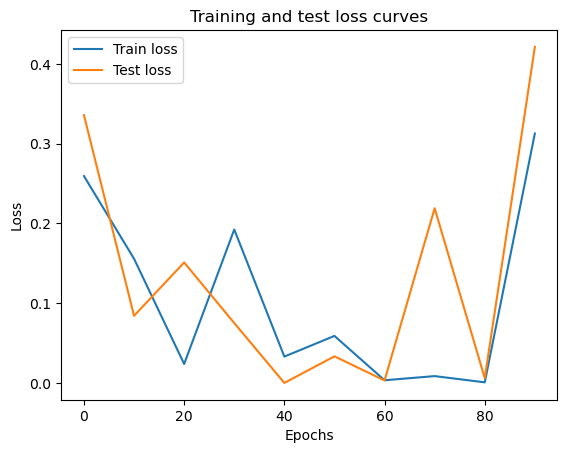

In [48]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [49]:
# Set the model to evaluation mode
model.eval()

# Generating predictions on the test set
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, y_pred_classes = torch.max(y_pred, 1)

# Convert predictions and true labels to NumPy arrays
y_pred_classes = y_pred_classes.cpu().numpy()
y_test = y_test_tensor.cpu().numpy()

# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)
print("Classification Report")
print(classification_report(y_test, y_pred_classes))

Confusion Matrix:
[[1121   24]
 [  15 1086]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1145
           1       0.98      0.99      0.98      1101

    accuracy                           0.98      2246
   macro avg       0.98      0.98      0.98      2246
weighted avg       0.98      0.98      0.98      2246



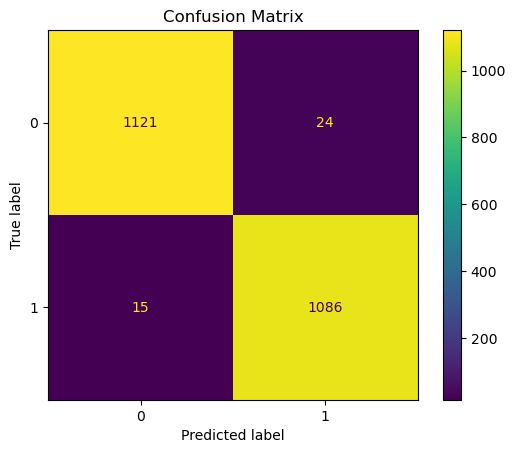

In [50]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes)
plt.title('Confusion Matrix')
plt.show()

In [51]:
model.eval()

all_predictions = []

with torch.inference_mode():
    for data in test_loader:
        X_batch, y_batch = data

        y_pred = model(X_batch)

        predictions = torch.argmax(y_pred, dim=1)

        all_predictions.extend(predictions.numpy())

print(all_predictions)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 

In [52]:
# Saving the model
path = Path("models")
path.mkdir(parents=True, exist_ok=True)

save_path = path / "mlp_exoplanet_classifier.pth"

print(f"Saving model to: {save_path}")
torch.save(obj=model.state_dict(),
        f=save_path)

Saving model to: models/mlp_exoplanet_classifier.pth


In [53]:
# Loading save model parameters
model.load_state_dict(torch.load('models/mlp_exoplanet_classifier.pth'))
print(model.parameters)

<bound method Module.parameters of MLP(
  (layer1): Linear(in_features=13, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=2, bias=True)
)>
